# Importing libraries and data

First, we import all the relevant packages

In [ ]:
pip install pandas numpy matplotlib seaborn nltk spacy prettytable transformers scikit-learn tensorflow torch torchvision torchaudio kagglehub


Defaulting to user installation because normal site-packages is not writeable
  Using cached spacy-3.8.7-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (27 kB)
  Using cached tensorflow-2.19.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
Using cached spacy-3.8.7-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (33.9 MB)
Using cached tensorflow-2.19.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (645.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import spacy
import nltk
nltk.download('punkt_tab')
from nltk import punkt
import prettytable
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
spacy.cli.download('en_core_web_sm')
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.metrics import Precision, Recall
import transformers as ppb
import warnings
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk import regexp_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nltk.download('punkt')          # downloads the punkt tokenizer models, which are used for sentence and word tokenization: fx. "word_tokenize()" or "sent_tokenize()$"
nltk.download('stopwords')      # downloads the stopwords corpus
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Now we shall download the dataset using the kaggleAPI

In [ ]:
# Step 1: Download dataset
path = kagglehub.dataset_download("paulinepeps/truth-seeker-dataset-2023-truthseeker2023")
print("Downloaded path:", path)

# Step 2: List all files in the directory
for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))  # This shows full paths to all files



100%|██████████| 49.5M/49.5M [00:00<00:00, 117MB/s]

Extracting files...


Downloaded path: /root/.cache/kagglehub/datasets/paulinepeps/truth-seeker-dataset-2023-truthseeker2023/versions/1
/root/.cache/kagglehub/datasets/paulinepeps/truth-seeker-dataset-2023-truthseeker2023/versions/1/TruthSeeker2023/Truth_Seeker_Model_Dataset_With_TimeStamps 1.xlsx
/root/.cache/kagglehub/datasets/paulinepeps/truth-seeker-dataset-2023-truthseeker2023/versions/1/TruthSeeker2023/Truth_Seeker_Model_Dataset.csv
/root/.cache/kagglehub/datasets/paulinepeps/truth-seeker-dataset-2023-truthseeker2023/versions/1/TruthSeeker2023/Features_For_Traditional_ML_Techniques.csv
/root/.cache/kagglehub/datasets/paulinepeps/truth-seeker-dataset-2023-truthseeker2023/versions/1/TruthSeeker2023/~$Truth_Seeker_Model_Dataset_With_TimeStamps 1.xlsx
/root/.cache/kagglehub/datasets/paulinepeps/truth-seeker-dataset-2023-truthseeker2023/versions/1/TruthSeeker2023/readme.txt


In [ ]:
# Now build the remaining part of the path correctly
csv_path = os.path.join(path, "TruthSeeker2023", "Truth_Seeker_Model_Dataset.csv")

# Load the CSV
df_raw = pd.read_csv(csv_path)

# Preview
df_raw.head()

,Unnamed: 0,author,statement,target,BinaryNumTarget,manual_keywords,tweet,5_label_majority_answer,3_label_majority_answer
0,0,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders - 6 Month Update\n\nInfl...,Mostly Agree,Agree
1,1,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,NO MAJORITY,Agree
2,2,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",THE SUPREME COURT is siding with super rich pr...,Agree,Agree
3,3,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders\n\nBroken campaign promi...,Mostly Agree,Agree
4,4,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@OhComfy I agree. The confluence of events rig...,Agree,Agree


In [ ]:
df_tweets = df_raw#.sample(n=90000, random_state = 42)
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134198 entries, 0 to 134197
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               134198 non-null  int64  
 1   author                   134198 non-null  object 
 2   statement                134198 non-null  object 
 3   target                   134198 non-null  bool   
 4   BinaryNumTarget          134198 non-null  float64
 5   manual_keywords          134198 non-null  object 
 6   tweet                    134198 non-null  object 
 7   5_label_majority_answer  134198 non-null  object 
 8   3_label_majority_answer  134198 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 8.3+ MB


In [ ]:
#We remove the rows where 3_label_majority_answer doesn't contain agree or disagree
df_tweets = df_tweets[df_tweets['3_label_majority_answer'].isin(['Disagree', 'Agree'])]

In [ ]:
#Creating a column for classifying if tweet contains fake news or not
def label_fake_news(df):
    df['target_tweet'] = np.where(
        ((df['BinaryNumTarget'] == 1) & (df['3_label_majority_answer'] == 'Disagree')) |
        ((df['BinaryNumTarget'] == 0) & (df['3_label_majority_answer'] == 'Agree')),
        0,
        1
    )
    return df
    # 0 = fake news
    # 1 = non-fake news

#Applying function to df
df_tweets = label_fake_news(df_tweets)

In [ ]:
df_tweets.head()

,Unnamed: 0,author,statement,target,BinaryNumTarget,manual_keywords,tweet,5_label_majority_answer,3_label_majority_answer,target_tweet
0,0,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders - 6 Month Update\n\nInfl...,Mostly Agree,Agree,1
1,1,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,NO MAJORITY,Agree,1
2,2,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",THE SUPREME COURT is siding with super rich pr...,Agree,Agree,1
3,3,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders\n\nBroken campaign promi...,Mostly Agree,Agree,1
4,4,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@OhComfy I agree. The confluence of events rig...,Agree,Agree,1


In [ ]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134198 entries, 0 to 134197
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               134198 non-null  int64  
 1   author                   134198 non-null  object 
 2   statement                134198 non-null  object 
 3   target                   134198 non-null  bool   
 4   BinaryNumTarget          134198 non-null  float64
 5   manual_keywords          134198 non-null  object 
 6   tweet                    134198 non-null  object 
 7   5_label_majority_answer  134198 non-null  object 
 8   3_label_majority_answer  134198 non-null  object 
 9   target_tweet             134198 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 9.3+ MB


In [ ]:
df_tweets['3_label_majority_answer'].unique()

array(['Agree', 'Disagree'], dtype=object)

In [ ]:
df_tweets['target_tweet'].value_counts()

,count
target_tweet,
1,68985
0,65213


In [ ]:
#Checking if there is a difference between the classification of the news article and our classification of the tweet
numberMismatch = len(df_tweets[(df_tweets['target_tweet'] == 0) & (df_tweets['BinaryNumTarget'] == 1)])

print(numberMismatch)

numberMismatch2 = len(df_tweets[(df_tweets['target_tweet'] == 1) & (df_tweets['BinaryNumTarget'] == 0)])

print(numberMismatch2)

2836
2891


We do see some rows, where the tweet isn't fake news, but where the news article is fake news and the other way around. This means that we keep the column we created for labeling whether a tweet is fake news or not.

# Preprocssing and EDA

Lets check to see how balanced our target variable is

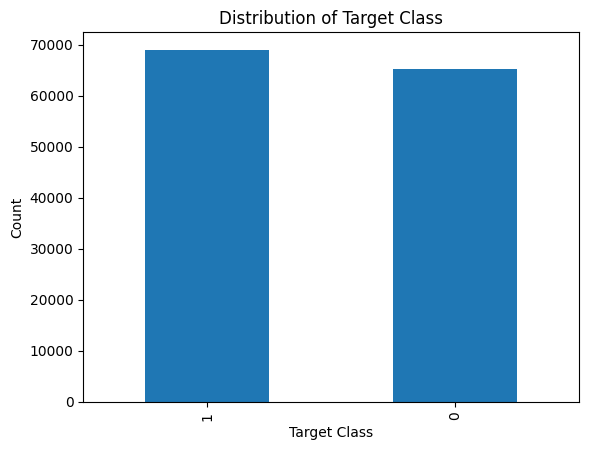

the balance in our dataset can be shown as follows: target
True     0.513644
False    0.486356
Name: proportion, dtype: float64


In [ ]:
#check distribution of target class
df_tweets['target_tweet'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Class')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()

#print procentage of each class as numeric values and do not visualize
balance =df_tweets['target'].value_counts(normalize=True)
print(f'the balance in our dataset can be shown as follows: {balance}')

We see that we have a nearly perfecetly balanced dataset, which is well suited to work with for our classification models. However, it is important to bear in mind that we have a slight overweight of "true"-labels in the data and this should be considered when interpreting the results of our models.

In [ ]:
import spacy
from tqdm import tqdm

# Load spaCy model and disable unnecessary components
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])  # Only need tokenizer + tagger

def clean_doc_with_hash_at(doc):
    return " ".join([
        token.lemma_ if not (token.text.startswith("@") or token.text.startswith("#")) else token.text
        for token in doc
        if token.is_alpha or token.text.startswith(("@", "#"))
    ])

In [ ]:
# Convert column to list
texts = df_tweets['tweet'].tolist()

# Fast batch processing
processed_texts_with_hash_at = [clean_doc_with_hash_at(doc) for doc in tqdm(nlp.pipe(texts, batch_size=1000))]

# Save to DataFrame
df_tweets['processed_text_with_hash_at'] = processed_texts_with_hash_at

134198it [07:27, 299.94it/s]


In [ ]:
# Optional preview
df_tweets['processed_text_with_hash_at'].head(30)

,processed_text_with_hash_at
0,@POTUS Biden Blunders Month Update Inflation D...
1,@S0SickRick @Stairmaster @6d6f636869 not as ma...
2,the SUPREME court be side with super rich prop...
3,@POTUS Biden Blunders break campaign promise I...
4,@OhComfy I agree the confluence of event right...
5,I say this before but it really be incredibly ...
6,as many face backlogge rent payment Americans ...
7,@Thomas1774Paine @JoeBiden # # INSTRUCTING # #...
8,@SocialismIsDone @TheeKHiveQueenB its a win fo...
9,@daysofarelives2 @Sen_JoeManchin there be not ...


In [ ]:
# Function to check for presence of hashtags
def contains_hashtag(text):
    return any(word.startswith('#') for word in text.split())

# Apply directly to the DataFrame, no need to create a separate one
df_tweets['has_hashtag'] = df_tweets['processed_text_with_hash_at'].apply(contains_hashtag)

# Count how many tweets contain at least one hashtag
hashtag_count = df_tweets['has_hashtag'].sum()

print("Number of tweets with at least one hashtag:", hashtag_count)

Number of tweets with at least one hashtag: 15320


In [ ]:
#now we apply Spacy and remove @ and #
import spacy
from tqdm import tqdm  # Optional: shows a progress bar

# Load spaCy model
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])  # Speeds it up even more

def clean_doc(doc):
    return " ".join([
        token.lemma_.lower()
        for token in doc
        if token.is_alpha and not token.is_stop
    ])

In [ ]:
# Apply preprocessing with nlp.pipe (faster)
texts = df_tweets['tweet'].tolist()

# Use tqdm for progress tracking (optional)
processed_texts = [clean_doc(doc) for doc in tqdm(nlp.pipe(texts, batch_size=1000))]

# Store result back in DataFrame
df_tweets['processed_text_wo_hash_at'] = processed_texts

134198it [07:31, 296.96it/s]


In [ ]:
#Now we create subsets of fake news and non-fake news
df_fake_news = df_tweets[df_tweets['target_tweet']==0]
df_non_fake_news = df_tweets[df_tweets['target_tweet']==1]

# NER

In [ ]:
#Doing NER


#Here, we do NER that takes @ and # into account
# Load spaCy model
model = spacy.load("en_core_web_sm")

#Because NER looks up words in context by looking after phrases that matches the lexicon, we make sure to split multiple usernames being categorised as one entity.
#function to extract named entities from spaCy with some consideration for @ exceptions
def extract_entities_hash_at(text):
    doc = model(text)
    entities = []

    for ent in doc.ents:
        # Breaking apart wrongly merged @ and relabeling all @mentions as Usernames
        #First we check for usernames are attached togather and some random words ontop of it as well
        if ent.text.startswith("@") and " " in ent.text:
            text_parts = ent.text.split()
            for word in text_parts:
                #Checks for the word starting with @ and splits it to be labeled as Username
                if word.startswith("@"):
                    entities.append((word, "USERNAME"))
                else:
                    #In case spacy also attached words without @, we cannot rerun the model without the entire context, so we mark it as unresolved
                    entities.append((word, "UNRESOLVED"))
        #Checks for the word starting with @ and splits it to be labeled as Username
        elif ent.text.startswith("@"):
            entities.append((ent.text, "USERNAME"))
        #Adds the word back normally if there are no exceptions
        else:
            entities.append((ent.text, ent.label_))
    return entities


In [ ]:
#Here, we do a regular NER on our processed data without @ and #
# Function to extract named entities from spaCy
def extract_entities(text):
    doc = model(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

In [ ]:
#Now we create subsets of fake news and non-fake news
df_fake_news = df_tweets[df_tweets['target_tweet']==0]
df_non_fake_news = df_tweets[df_tweets['target_tweet']==1]

In [ ]:
#Now we apply NER to the subsets

#Fist we apply it to fake news
df_fake_news['entities_with_hash_at'] = df_fake_news['processed_text_with_hash_at'].apply(extract_entities_hash_at)


df_fake_news['entities_wo_hash_at'] = df_fake_news['processed_text_wo_hash_at'].apply(extract_entities)

"""# Extract and flatten entities, then take only the first 10
flat_entities = df_fake_news['entities_wo_hash_at'].explode().dropna().tolist()[:10]

table = PrettyTable(["Entity", "Label"])
for ent in flat_entities:
    if ent:
        table.add_row(ent)

print(table)"""

/tmp/ipykernel_1310/2783424868.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_news['entities_with_hash_at'] = df_fake_news['processed_text_with_hash_at'].apply(extract_entities_hash_at)
/tmp/ipykernel_1310/2783424868.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_news['entities_wo_hash_at'] = df_fake_news['processed_text_wo_hash_at'].apply(extract_entities)


'# Extract and flatten entities, then take only the first 10\nflat_entities = df_fake_news[\'entities_wo_hash_at\'].explode().dropna().tolist()[:10]\n\ntable = PrettyTable(["Entity", "Label"])\nfor ent in flat_entities:\n    if ent:\n        table.add_row(ent)\n\nprint(table)'

In [ ]:
#Now, we apply it to non-fake news
df_non_fake_news['entities_with_hash_at'] = df_non_fake_news['processed_text_with_hash_at'].apply(extract_entities_hash_at)

df_non_fake_news['entities_wo_hash_at'] = df_non_fake_news['processed_text_wo_hash_at'].apply(extract_entities)

flat_entities_NER_fake_news_wo_punct = df_fake_news['entities_wo_hash_at'].explode().dropna().tolist()



/tmp/ipykernel_1310/1578139978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_fake_news['entities_with_hash_at'] = df_non_fake_news['processed_text_with_hash_at'].apply(extract_entities_hash_at)
/tmp/ipykernel_1310/1578139978.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_fake_news['entities_wo_hash_at'] = df_non_fake_news['processed_text_wo_hash_at'].apply(extract_entities)


In [ ]:
#Now we create a df for NER
#First, we flatten the NER and words
flat_entities_NER_fake_news_wo_punct = df_fake_news['entities_wo_hash_at'].explode().dropna().tolist()
flat_entities_NER_fake_news_w_punct = df_fake_news['entities_with_hash_at'].explode().dropna().tolist()

#Now, we create a df
dfNER_fake_news_wo_punct = pd.DataFrame(columns= ['Word_fake_news_wo_hash_at', 'NER_fake_news_wo_hash_at'])
dfNER_fake_news_w_punct = pd.DataFrame(columns= ['Word_fake_news_w_hash_at', 'NER_fake_news_w_hash_at'])

#inserting data into dfNER_non_fake_news_wo_punct
for ent in flat_entities_NER_fake_news_wo_punct:
    if ent:
        dfNER_fake_news_wo_punct.loc[len(dfNER_fake_news_wo_punct)] = ent  # Adds a new row after the last row (loc[len])
        #dfNER_non_fake_news.loc[len(dfNER_non_fake_news)] = flat_entities_NER_fake_news_w_punct[ent]

#inserting data into dfNER_non_fake_news_w_punct
for ent in flat_entities_NER_fake_news_w_punct:
    if ent:
        dfNER_fake_news_w_punct.loc[len(dfNER_fake_news_w_punct)] = ent

In [ ]:
#Now we do the same for non-fake news
flat_entities_NER_non_fake_news_wo_punct = df_non_fake_news['entities_wo_hash_at'].explode().dropna().tolist()
flat_entities_NER_non_fake_news_w_punct = df_non_fake_news['entities_with_hash_at'].explode().dropna().tolist()
#flat_entities_NER_fake_news_w_punct = df_non_fake_news['entities_wo_punct'].explode().dropna().tolist()

#Now, we create a df
#dfNER_fake_news = pd.DataFrame(columns = ['Word_fake_news_w_punct', 'NER_fake_news_w_punct','Word_fake_news_wo_punct', 'NER_fake_news_wo_punct'])

dfNER_non_fake_news_wo_punct = pd.DataFrame(columns= ['Word_non_fake_news_wo_hash_at', 'NER_non_fake_news_wo_hash_at'])
dfNER_non_fake_news_w_punct = pd.DataFrame(columns= ['Word_non_fake_news_w_hash_at', 'NER_non_fake_news_w_hash_at'])

#inserting data into dfNER_non_fake_news_wo_punct
for ent in flat_entities_NER_non_fake_news_wo_punct:
    if ent:
        dfNER_non_fake_news_wo_punct.loc[len(dfNER_non_fake_news_wo_punct)] = ent  # Adds a new row after the last row (loc[len])
        #dfNER_non_fake_news.loc[len(dfNER_non_fake_news)] = flat_entities_NER_fake_news_w_punct[ent]

#inserting data into dfNER_non_fake_news_w_punct
for ent in flat_entities_NER_non_fake_news_w_punct:
    if ent:
        dfNER_non_fake_news_w_punct.loc[len(dfNER_non_fake_news_w_punct)] = ent

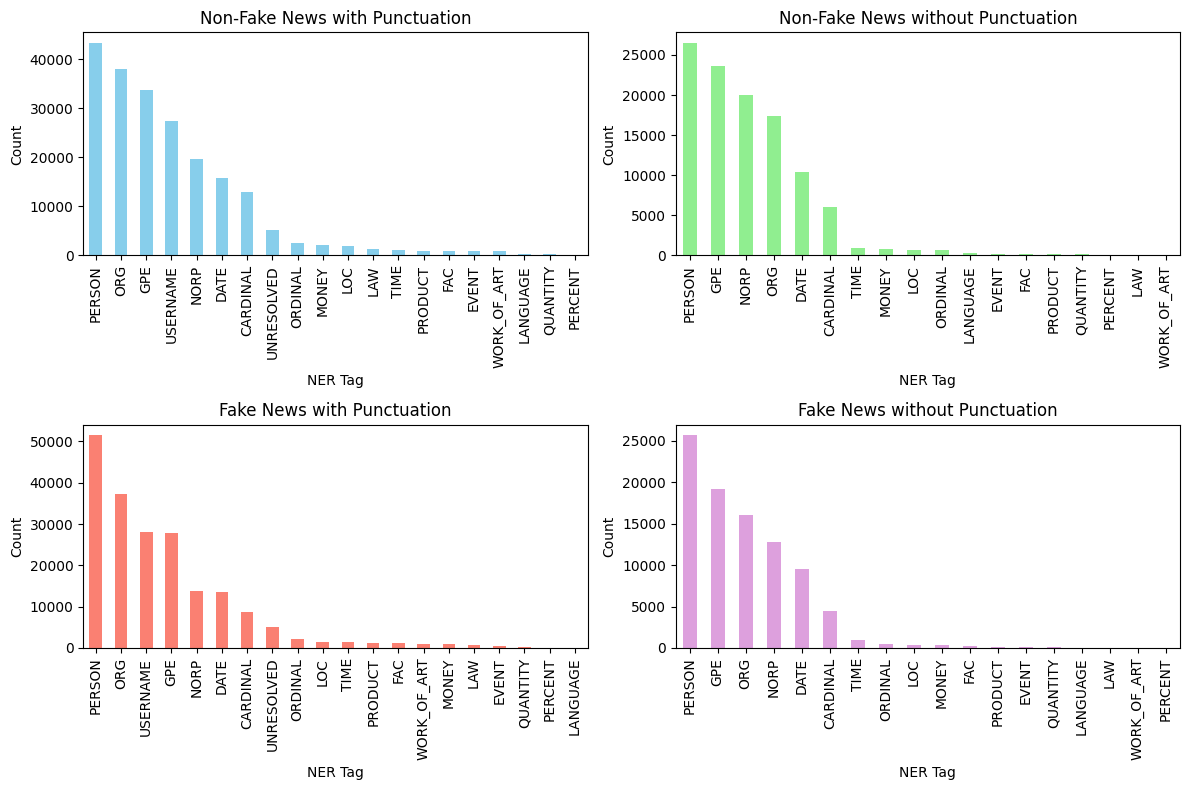

In [ ]:
#Now we visualize the POS tags
import matplotlib.pyplot as plt

# Count the occurrences of each POS tag
dfNER_non_fake_news_w_punct_count = dfNER_non_fake_news_w_punct['NER_non_fake_news_w_hash_at'].value_counts()
dfNER_non_fake_news_wo_punct_count = dfNER_non_fake_news_wo_punct['NER_non_fake_news_wo_hash_at'].value_counts()
dfNER_fake_news_w_punct_count = dfNER_fake_news_w_punct['NER_fake_news_w_hash_at'].value_counts()
dfNER_fake_news_wo_punct_count = dfNER_fake_news_wo_punct['NER_fake_news_wo_hash_at'].value_counts()

# Set up a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot each subplot
dfNER_non_fake_news_w_punct_count.plot(kind='bar', ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Non-Fake News with Punctuation')
axs[0, 0].set_xlabel('NER Tag')
axs[0, 0].set_ylabel('Count')

dfNER_non_fake_news_wo_punct_count.plot(kind='bar', ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title('Non-Fake News without Punctuation')
axs[0, 1].set_xlabel('NER Tag')
axs[0, 1].set_ylabel('Count')

dfNER_fake_news_w_punct_count.plot(kind='bar', ax=axs[1, 0], color='salmon')
axs[1, 0].set_title('Fake News with Punctuation')
axs[1, 0].set_xlabel('NER Tag')
axs[1, 0].set_ylabel('Count')

dfNER_fake_news_wo_punct_count.plot(kind='bar', ax=axs[1, 1], color='plum')
axs[1, 1].set_title('Fake News without Punctuation')
axs[1, 1].set_xlabel('NER Tag')
axs[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

POS

In [ ]:
# Load spaCy model (once globally)
nlp = spacy.load("en_core_web_sm")

def extract_POS_tags(text):
    doc = nlp(text)
    pos_info = []

    for token in doc:
        if token.text.startswith("@"):
            pos_info.append((token.text, "USERNAME"))
        else:
            pos_info.append((token.text, token.pos_))  # Universal POS tag

    return pos_info

In [ ]:
#Now we apply POS to the subsets

#Fist we apply it to fake news
df_fake_news['POS_wo_hash_at'] = df_fake_news['processed_text_wo_hash_at'].apply(extract_POS_tags)



df_fake_news['POS_with_hash_at'] = df_fake_news['processed_text_with_hash_at'].apply(extract_POS_tags)

/tmp/ipykernel_1310/2779585617.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_news['POS_wo_hash_at'] = df_fake_news['processed_text_wo_hash_at'].apply(extract_POS_tags)
/tmp/ipykernel_1310/2779585617.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_news['POS_with_hash_at'] = df_fake_news['processed_text_with_hash_at'].apply(extract_POS_tags)


In [ ]:
#Now we apply it to non-fake news
df_non_fake_news['POS_wo_hash_at'] = df_non_fake_news['processed_text_wo_hash_at'].apply(extract_POS_tags)


df_non_fake_news['POS_with_hash_at'] = df_non_fake_news['processed_text_with_hash_at'].apply(extract_POS_tags)


/tmp/ipykernel_1310/907016396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_fake_news['POS_wo_hash_at'] = df_non_fake_news['processed_text_wo_hash_at'].apply(extract_POS_tags)
/tmp/ipykernel_1310/907016396.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_fake_news['POS_with_hash_at'] = df_non_fake_news['processed_text_with_hash_at'].apply(extract_POS_tags)


In [ ]:
# ✅ Flatten the POS columns for fake news
flat_entities_POS_fake_news_wo_punct = [
    ent for ent in df_fake_news['POS_with_hash_at'].explode().dropna()
    if isinstance(ent, (list, tuple)) and len(ent) == 2
]

flat_entities_POS_fake_news_w_punct = [
    ent for ent in df_fake_news['POS_wo_hash_at'].explode().dropna()
    if isinstance(ent, (list, tuple)) and len(ent) == 2
]

# ✅ Create DataFrames directly from flattened lists
dfPOS_fake_news_wo_punct = pd.DataFrame(
    flat_entities_POS_fake_news_wo_punct,
    columns=['Word_fake_news_wo_hash_at', 'POS_fake_news_wo_hash_at']
)

dfPOS_fake_news_w_punct = pd.DataFrame(
    flat_entities_POS_fake_news_w_punct,
    columns=['Word_fake_news_with_hash_at', 'POS_fake_news_with_hash_at']
)


In [ ]:
flat_entities_POS_non_fake_news_wo_punct = [
    ent for ent in df_non_fake_news['POS_with_hash_at'].explode().dropna()
    if isinstance(ent, (list, tuple)) and len(ent) == 2
]

flat_entities_POS_non_fake_news_w_punct = [
    ent for ent in df_non_fake_news['POS_wo_hash_at'].explode().dropna()
    if isinstance(ent, (list, tuple)) and len(ent) == 2
]

dfPOS_non_fake_news_wo_punct = pd.DataFrame(
    flat_entities_POS_non_fake_news_wo_punct,
    columns=['Word_non_fake_news_wo_hash_at', 'POS_non_fake_news_wo_hash_at']
)

dfPOS_non_fake_news_w_punct = pd.DataFrame(
    flat_entities_POS_non_fake_news_w_punct,
    columns=['Word_non_fake_news_with_hash_at', 'POS_non_fake_news_with_hash_at']
)


In [ ]:
non_propn_handles = [(word, tag) for word, tag in flat_entities_POS_fake_news_w_punct if word.startswith("@") and tag != "PROPN"]
if non_propn_handles:
    print("\n The following @handles were NOT labeled as PROPN:")
    for word, tag in non_propn_handles:
        print(f"  {word} → {tag}")
else:
    print("\n All @handles were correctly labeled as PROPN.")


 All @handles were correctly labeled as PROPN.


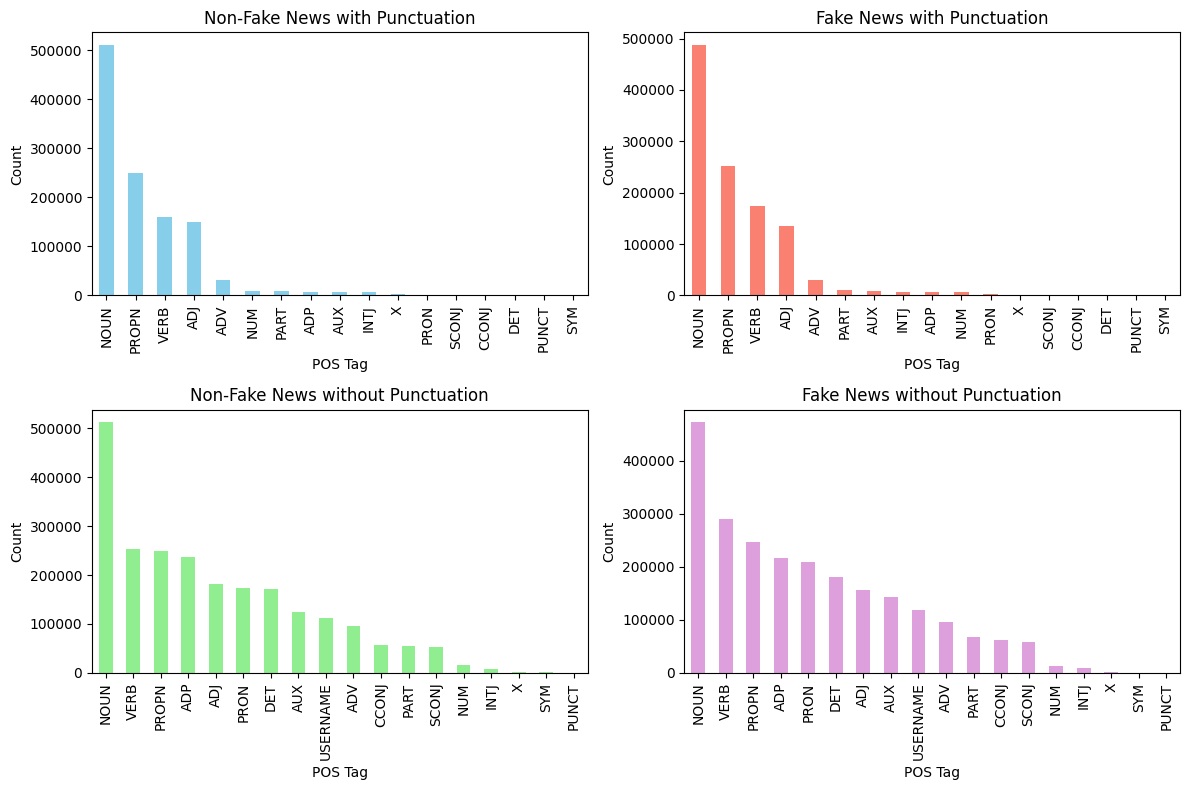

In [ ]:
# Count the occurrences of each POS tag
dfPOS_non_fake_news_w_punct_count = dfPOS_non_fake_news_w_punct['POS_non_fake_news_with_hash_at'].value_counts()
dfPOS_non_fake_news_wo_punct_count = dfPOS_non_fake_news_wo_punct['POS_non_fake_news_wo_hash_at'].value_counts()
dfPOS_fake_news_w_punct_count = dfPOS_fake_news_w_punct['POS_fake_news_with_hash_at'].value_counts()
dfPOS_fake_news_wo_punct_count = dfPOS_fake_news_wo_punct['POS_fake_news_wo_hash_at'].value_counts()


# Set up a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot each subplot
dfPOS_non_fake_news_w_punct_count.plot(kind='bar', ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Non-Fake News with Punctuation')
axs[0, 0].set_xlabel('POS Tag')
axs[0, 0].set_ylabel('Count')

dfPOS_non_fake_news_wo_punct_count.plot(kind='bar', ax=axs[1, 0], color='lightgreen')
axs[1, 0].set_title('Non-Fake News without Punctuation')
axs[1, 0].set_xlabel('POS Tag')
axs[1, 0].set_ylabel('Count')

dfPOS_fake_news_w_punct_count.plot(kind='bar', ax=axs[0, 1], color='salmon')
axs[0, 1].set_title('Fake News with Punctuation')
axs[0, 1].set_xlabel('POS Tag')
axs[0, 1].set_ylabel('Count')

dfPOS_fake_news_wo_punct_count.plot(kind='bar', ax=axs[1, 1], color='plum')
axs[1, 1].set_title('Fake News without Punctuation')
axs[1, 1].set_xlabel('POS Tag')
axs[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS

def text_to_list(text):
    tokens = text.split()
    clean_tokens = [
        token for token in tokens
        if token not in STOP_WORDS
    ]
    return clean_tokens


In [ ]:
df_tweets['processed_text_wo_hash_at_list']=df_tweets['processed_text_wo_hash_at'].apply(text_to_list)

In [ ]:
df_tweets['processed_text_wo_hash_at_list'].head()

,processed_text_wo_hash_at_list
0,"[biden, blunders, month, update, inflation, de..."
1,"[people, literally, starve, street, century, c..."
2,"[supreme, court, super, rich, property, owner,..."
3,"[biden, blunders, break, campaign, promise, in..."
4,"[agree, confluence, event, right, unprecedente..."


In [ ]:
df_fake_news['processed_text_wo_hash_at_list']=df_tweets['processed_text_wo_hash_at'].apply(text_to_list)
df_non_fake_news['processed_text_wo_hash_at_list']=df_tweets['processed_text_wo_hash_at'].apply(text_to_list)

<ipython-input-71-7a1837309e06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_news['processed_text_wo_hash_at_list']=df_tweets['processed_text_wo_hash_at'].apply(text_to_list)
<ipython-input-71-7a1837309e06>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_fake_news['processed_text_wo_hash_at_list']=df_tweets['processed_text_wo_hash_at'].apply(text_to_list)


In [ ]:
df_fake_news['processed_text_wo_hash_at_list'].head()

,processed_text_wo_hash_at_list
15,"[trump, attempt, mandate, mask, biden, want, v..."
20,"[gym, remember, donald, trump, covid, away, sh..."
48,"[insane, cdc, unconstitutionally, extend, evic..."
55,"[biden, blunders, month, update, inflation, de..."
65,"[certainly, think, deserve, homeless, especial..."


# Topic modeling

In [ ]:
#We start by using TF-IDF to our data
#We use perfom the model on the two subsets fake news and non-fake news using the preprocessed text containing @ and #

#preprocessor=lambda x: x disables lower case because we already preprocessed the data.
#tokenizer=lambda x: x disables tokeniing, because data is already tokenized in text_to_list

vectorizer_FN_wo_hash_at = TfidfVectorizer(max_features=5000, preprocessor=lambda x: x, tokenizer=lambda x: x, token_pattern=None,)
X_fake_news = vectorizer_FN_wo_hash_at.fit_transform(df_fake_news['processed_text_wo_hash_at_list'])

vectorizer_NFN_wo_hash_at = TfidfVectorizer(max_features=5000, preprocessor=lambda x: x, tokenizer=lambda x: x, token_pattern=None,)
X_non_fake_news = vectorizer_NFN_wo_hash_at.fit_transform(df_non_fake_news['processed_text_wo_hash_at_list'])



In [ ]:
#Now we look at the shape
print(X_fake_news.shape)
#(number of rows, number of dimensions/features from tf-idf)
print(X_non_fake_news.shape)

(65213, 5000)
(68985, 5000)


In [ ]:
#Now we start on LSA
from sklearn.decomposition import TruncatedSVD
#We want 10 topics, n_components=10
lsa_fake_news = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)
lsa_non_fake_news = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top_fake_news=lsa_fake_news.fit_transform(X_fake_news)
lsa_top_non_fake_news=lsa_non_fake_news.fit_transform(X_non_fake_news)

In [ ]:
l=lsa_top_fake_news[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)

Document 0 :
Topic  0  :  16.92326843865917
Topic  1  :  1.7457442127430194
Topic  2  :  4.665726771440647
Topic  3  :  2.711334583840672
Topic  4  :  -7.039865994017842
Topic  5  :  1.1293229171100299
Topic  6  :  -0.667911099151971
Topic  7  :  -3.589383925546082
Topic  8  :  -3.109500789855544
Topic  9  :  1.9643670283006942


In [ ]:
l=lsa_top_non_fake_news[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)

Document 0 :
Topic  0  :  11.113621301729665
Topic  1  :  -0.15459331575452773
Topic  2  :  4.377148277805901
Topic  3  :  3.2788146692518785
Topic  4  :  4.552437255079989
Topic  5  :  2.008018194868943
Topic  6  :  -0.22676510503200903
Topic  7  :  -4.947502942664098
Topic  8  :  -0.7990247563469934
Topic  9  :  -3.3833953892909046


In [ ]:
# most important words for each topic in fake news
vocab_fake_news = vectorizer_FN_wo_hash_at.get_feature_names_out()

for i, comp in enumerate(lsa_fake_news.components_):
    vocab_comp_fake_news = zip(vocab_fake_news, comp)
    sorted_words_fake_news = sorted(vocab_comp_fake_news, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words_fake_news:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
biden trump vaccine people vote covid amp joe election voter 

Topic 1: 
vaccine covid die mask vaccinate death immunity people pfizer approve 

Topic 2: 
biden tax joe taxis raise americans harris cut pay income 

Topic 3: 
vaccine tax taxis raise approve biden ballot pfizer fda income 

Topic 4: 
tax taxis die low george form raise politician income floyd 

Topic 5: 
mask wear vaccinate science fauci believe people ineffective prove march 

Topic 6: 
die covid floyd overdose drug cancer doctor cain herman trump 

Topic 7: 
sign madison declaration james independence bruno michael mars jackson son 

Topic 8: 
bruno michael son mars jackson video sound joe mar like 

Topic 9: 
biden joe mask madison sign declaration independence james form wear 



In [ ]:
# most important words for each topic for non-fake news
vocab_non_fake_news = vectorizer_NFN_wo_hash_at.get_feature_names_out()

for i, comp in enumerate(lsa_non_fake_news.components_):
    vocab_comp_non_fake_news = zip(vocab_non_fake_news, comp)
    sorted_words_non_fake_news = sorted(vocab_comp_non_fake_news, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words_non_fake_news:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
trump year wage high rate people tax pay americans minimum 

Topic 1: 
wage minimum high rate tax pay taxis inflation income job 

Topic 2: 
wage minimum job year today inflation rick perry trump power 

Topic 3: 
americans gun background check support die african wage american percent 

Topic 4: 
year black african american bear white people marijuana baby death 

Topic 5: 
code irs bible word year americans gopdebate obama golf good 

Topic 6: 
obama golf round play check background gun year rate nra 

Topic 7: 
vote act high rubio marco violence rate women obama romney 

Topic 8: 
marijuana year smoke today ago jeb bush drug flu kid 

Topic 9: 
pay tax african black american income bear taxis year wedlock 



LDA

In [ ]:
#Now we do LDA
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42) #We set the number of topics = 10

In [ ]:
lda_top=lda_model.fit_transform(X_fake_news)
lda_top=lda_model.fit_transform(X_non_fake_news)
#Contains (number_of_documents, number_of_topics)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-92-da6cc133a531>", line 1, in <cell line: 0>
    lda_top=lda_model.fit_transform(X_fake_news)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_lda.py", line 778, in fit_transform
    return self.fit(X, y).transform(X, normalize=normalize)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/decompos

In [ ]:
#Here, we se the composition of doc 0 as example
#i shows the weight of each topic in row 1
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  1.6184219209632273 %
Topic  1 :  5.445937935626434 %
Topic  2 :  1.6191710507067576 %
Topic  3 :  33.97190485607389 %
Topic  4 :  43.66892970263849 %
Topic  5 :  1.61846772246119 %
Topic  6 :  1.618411105447902 %
Topic  7 :  1.6184488602328821 %
Topic  8 :  1.618704485393242 %
Topic  9 :  7.20160236045598 %


In [ ]:
# most important words for each topic
vocab = vectorizer.get_feature_names_out() #get vocab from our model

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp) #zip matches word/topic with components (n_topics, n_words)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10] #creates a list of tuples with topic and key, key is weight of the topic
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
ballots michigan fraud mail voter election ballot win cure absentee 

Topic 1: 
trump obama his him biden antifa organization he floyd campaign 

Topic 2: 
harris vaccinated blm matter nancy cancer black car lives independence 

Topic 3: 
immunity fauci masks kamala different vaccines county form insider insurance 

Topic 4: 
the to of and in is that you for it 

Topic 5: 
cases testing coronavirus audit gun cut judge suicide trading drug 

Topic 6: 
women ukraine men record stamps liar food dropped crimea hottest 

Topic 7: 
votes pelosi checks party nevada romney voted background madison against 

Topic 8: 
georgia science mars democrat michael bruno dies march warren seen 

Topic 9: 
jobs million added code created 39 keystone growth transmission survival 



# Baseline Modelling

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS

# Optional: add known artifacts from HTML or contractions
#CUSTOM_STOPWORDS = STOP_WORDS.union({'amp', 't', 's', 'l'})

def text_to_list(text):
    tokens = text.split()  # text is already space-separated
    clean_tokens = [
        token for token in tokens
        if token not in STOP_WORDS and len(token) >1 and (token.startswith('@') or token.startswith('#') or token.isalpha())
        #if token.startswith('@') or token.startswith('#') or token.isalpha()
    ]
    return clean_tokens
df_tweets['processed_text_with_hash_at_list2']=df_tweets['processed_text_with_hash_at'].apply(text_to_list)

In [ ]:
#We start by using TF-IDF to our data

#preprocessor=lambda x: x disables lower case because we already preprocessed the data.
#tokenizer=lambda x: x disables tokeniing, because data is already tokenized in text_to_list
vectorizer = TfidfVectorizer(max_features=5000, preprocessor=lambda x: x, tokenizer=lambda x: x)
X = vectorizer.fit_transform(df_tweets['processed_text_with_hash_at_list2'])
y = df_tweets['target_tweet']

# Split the dataset into train (75%) and test (25%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y  #to balance
)

/home/ucloud/.local/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
#We want to see the shape -> the first number is number of documents(in this case rows), and the second number is number of unique words
print(X_train.shape)

(100648, 5000)


In [ ]:
#Here, we print the words in the vectormodel with its assigned values in the model
print(vectorizer.vocabulary_)

{'@POTUS': 151, 'Biden': 453, 'Inflation': 874, 'Delta': 627, 'covid': 2216, 'kid': 3240, 'abandon': 1536, 'Americans': 395, 'Afghanistan': 375, 'arm': 1701, 'Taliban': 1402, 'Border': 466, 'crisis': 2234, 'break': 1881, 'job': 3225, 'growth': 2907, 'power': 3871, 'Eviction': 685, 'miss': 3513, 'people': 3763, 'literally': 3336, 'starve': 4454, 'street': 4490, 'century': 1975, 'capitalism': 1945, 'grand': 2891, 'face': 2676, 'eviction': 2613, 'moratorium': 3538, 'threaten': 4652, 'million': 3498, 'homeless': 3001, 'fuck': 2818, 'propaganda': 3950, 'court': 2213, 'super': 4536, 'rich': 4174, 'property': 3953, 'owner': 3701, 'poor': 3841, 'struggle': 4501, 'american': 1647, 'block': 1849, 'pandemic': 3713, 'asshole': 1718, 'ready': 4033, 'campaign': 1932, 'promise': 3946, 'Dems': 633, 'leadership': 3279, 'amp': 1651, 'Moratorium': 1078, 'Vaccine': 1458, 'Mandates': 1021, 'agree': 1614, 'event': 2608, 'right': 4180, 'unprecedented': 4801, 'afghan': 1606, 'disaster': 2401, 'bombing': 1858,

In [ ]:
# Get average TF-IDF for each term
avg_tfidf = np.asarray(X.mean(axis=0)).flatten()

# Match with term names
terms = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame({'term': terms, 'avg_tfidf': avg_tfidf})

# Sort by TF-IDF importance
top_tfidf = tfidf_df.sort_values(by='avg_tfidf', ascending=False).head(20)

/tmp/ipykernel_1310/831854073.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_tfidf, x='avg_tfidf', y='term', palette=custom_palette)


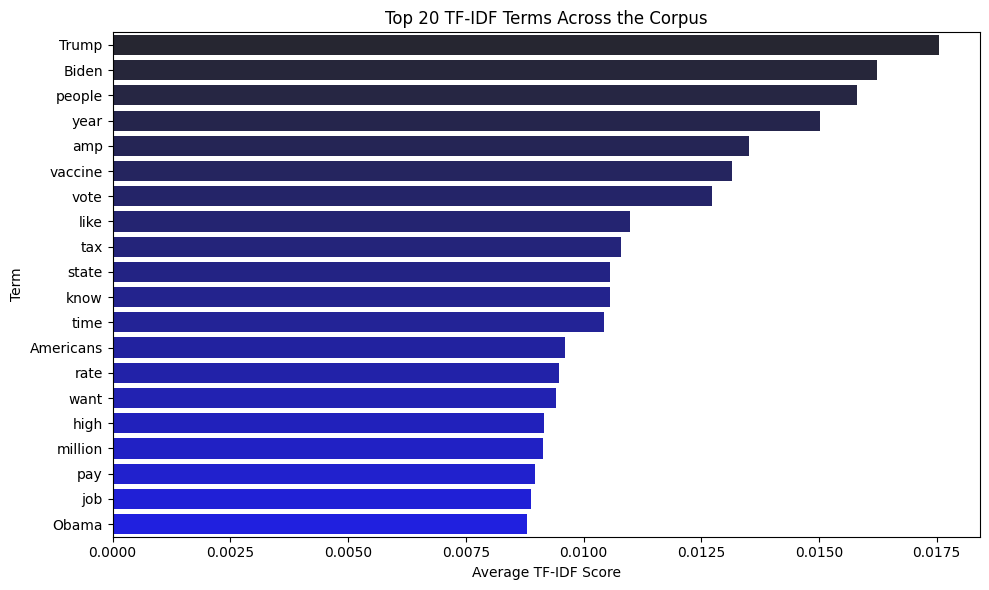

In [ ]:
plt.figure(figsize=(10, 6))
custom_palette = sns.dark_palette("blue", reverse=False, n_colors=20)
sns.barplot(data=top_tfidf, x='avg_tfidf', y='term', palette=custom_palette)
plt.title("Top 20 TF-IDF Terms Across the Corpus")
plt.xlabel("Average TF-IDF Score")
plt.ylabel("Term")
plt.tight_layout()
plt.show()

Naive

In [ ]:
#Now, we apply Naive Bayes

#We train the model
clf = MultinomialNB(alpha=1.0)
clf.fit(X_train, y_train)

#We apply/predict
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     16303
           1       0.89      0.91      0.90     17247

    accuracy                           0.89     33550
   macro avg       0.89      0.89      0.89     33550
weighted avg       0.89      0.89      0.89     33550



ROC AUC: 0.9392
Log Loss: 0.31616434301616503


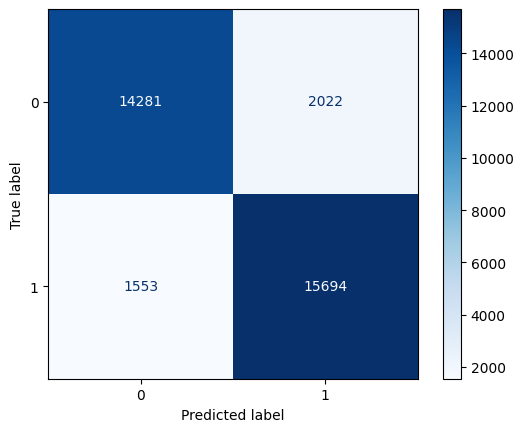

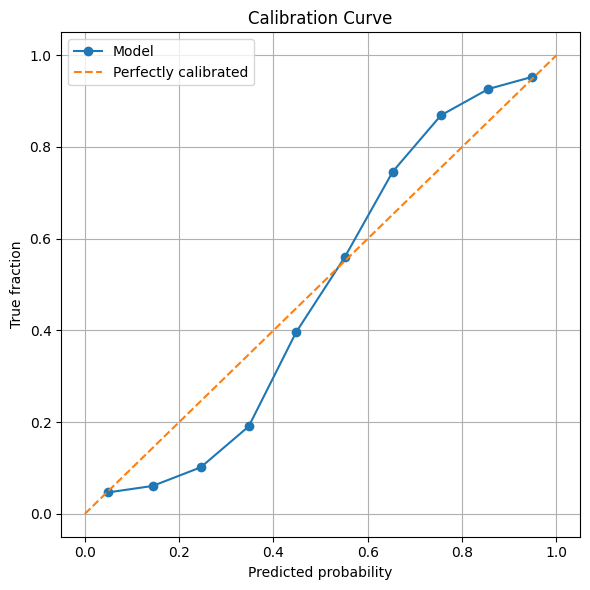

In [ ]:
#Now we create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap="Blues", values_format='d')

y_pred = clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {roc_auc:.4f}")

print("Log Loss:", log_loss(y_test, y_pred))

y_pred = clf.predict_proba(X_test)[:, 1]

prob_true, prob_pred = calibration_curve(y_test, y_pred, n_bins=10, strategy='uniform')

plt.figure(figsize=(6, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Predicted probability')
plt.ylabel('True fraction')
plt.title('Calibration Curve')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
def show_most_informative_features(vectorizer, clf, n=20, class_labels=None):
    feature_names = np.array(vectorizer.get_feature_names_out())
    class_labels = clf.classes_ if class_labels is None else class_labels

    top_features = []
    for i, class_label in enumerate(class_labels):
        # Get sorted log prob differences
        sorted_indices = np.argsort(clf.feature_log_prob_[i] - clf.feature_log_prob_[1 - i])[::-1]
        topn = sorted_indices[:n]
        for idx in topn:
            prob_ratio = np.exp(clf.feature_log_prob_[i][idx] - clf.feature_log_prob_[1 - i][idx])
            top_features.append((feature_names[idx], class_label, class_labels[1 - i], prob_ratio))

    # Format like NLTK's output
    df = pd.DataFrame(top_features[:n], columns=["Feature", "Class A", "Class B", "A:B Ratio"])
    df["A:B Ratio"] = df["A:B Ratio"].apply(lambda x: f"{x:.1f} : 1.0")
    print("Most Informative Features\n" + df.to_string(index=False))

# Example usage:
show_most_informative_features(vectorizer, clf, n=20)

Most Informative Features
    Feature  Class A  Class B  A:B Ratio
        DMX        0        1 37.5 : 1.0
      Bruno        0        1 37.3 : 1.0
   forensic        0        1 25.3 : 1.0
    Burisma        0        1 24.6 : 1.0
      Ashli        0        1 24.3 : 1.0
   basement        0        1 23.7 : 1.0
      ComOn        0        1 23.7 : 1.0
    Babbitt        0        1 22.2 : 1.0
      Rolex        0        1 22.1 : 1.0
      Malia        0        1 22.1 : 1.0
     Patton        0        1 21.7 : 1.0
      Blake        0        1 21.6 : 1.0
    Jackson        0        1 21.6 : 1.0
       dreg        0        1 21.2 : 1.0
defenseless        0        1 21.1 : 1.0
       Mars        0        1 20.9 : 1.0
   deadline        0        1 20.6 : 1.0
preexisting        0        1 20.5 : 1.0
      HIPAA        0        1 20.3 : 1.0
     Nadler        0        1 19.8 : 1.0


In [ ]:
def show_most_informative_features(vectorizer, clf, n=20, class_labels=None):
    feature_names = np.array(vectorizer.get_feature_names_out())
    class_labels = clf.classes_ if class_labels is None else class_labels

    def format_table(i):
        other_i = 1 - i
        class_a = class_labels[i]
        class_b = class_labels[other_i]
        sorted_indices = np.argsort(clf.feature_log_prob_[i] - clf.feature_log_prob_[other_i])[::-1]
        topn = sorted_indices[:n]
        rows = []
        for idx in topn:
            ratio = np.exp(clf.feature_log_prob_[i][idx] - clf.feature_log_prob_[other_i][idx])
            df_count = X_train.getcol(idx).count_nonzero()  # How many training docs contain this feature
            rows.append((feature_names[idx], class_a, class_b, ratio, df_count))
        rows_sorted = sorted(rows, key=lambda x: x[4], reverse=True)[:n] #Sort by training docs return this for the sorted
        return pd.DataFrame(rows_sorted, columns=["Feature", "Class A", "Class B", "A:B Ratio", "Train Docs"])

    df_a_vs_b = format_table(0)
    df_b_vs_a = format_table(1)

    df_a_vs_b["A:B Ratio"] = df_a_vs_b["A:B Ratio"].apply(lambda x: f"{x:.1f} : 1.0")
    df_b_vs_a["A:B Ratio"] = df_b_vs_a["A:B Ratio"].apply(lambda x: f"{x:.1f} : 1.0")

    print("\nMost Informative Features (Class {} vs. {})\n{}".format(
        class_labels[0], class_labels[1], df_a_vs_b.to_string(index=False)))

    print("\nMost Informative Features (Class {} vs. {})\n{}".format(
        class_labels[1], class_labels[0], df_b_vs_a.to_string(index=False)))

show_most_informative_features(vectorizer, clf, n=20)


Most Informative Features (Class 0 vs. 1)
    Feature  Class A  Class B  A:B Ratio  Train Docs
       Mars        0        1 20.9 : 1.0         582
   forensic        0        1 25.3 : 1.0         435
     Nadler        0        1 19.8 : 1.0         435
   basement        0        1 23.7 : 1.0         402
      Ashli        0        1 24.3 : 1.0         389
      Blake        0        1 21.6 : 1.0         386
    Babbitt        0        1 22.2 : 1.0         384
      Bruno        0        1 37.3 : 1.0         343
   deadline        0        1 20.6 : 1.0         342
      HIPAA        0        1 20.3 : 1.0         316
    Jackson        0        1 21.6 : 1.0         315
      Rolex        0        1 22.1 : 1.0         251
preexisting        0        1 20.5 : 1.0         248
        DMX        0        1 37.5 : 1.0         245
     Patton        0        1 21.7 : 1.0         233
defenseless        0        1 21.1 : 1.0         185
      Malia        0        1 22.1 : 1.0         170
   

In [ ]:
def show_most_informative_mentions_nb_at(vectorizer, clf, n=20, class_labels=None):
    feature_names = np.array(vectorizer.get_feature_names_out())
    class_labels = clf.classes_ if class_labels is None else class_labels

    def format_table(i):
        other_i = 1 - i
        class_a = class_labels[i]
        class_b = class_labels[other_i]

        # Compute log prob difference and filter features that start with '@'
        log_prob_diff = clf.feature_log_prob_[i] - clf.feature_log_prob_[other_i]
        is_mention = np.array([str(f).startswith('@') for f in feature_names])
        mention_indices = np.where(is_mention)[0]

        mention_indices = np.where(is_mention)[0]
        mention_diff = log_prob_diff[mention_indices]
        sorted_indices = mention_indices[np.argsort(mention_diff)[::-1][:n]]

        rows = []
        for idx in sorted_indices:
            ratio = np.exp(clf.feature_log_prob_[i][idx] - clf.feature_log_prob_[other_i][idx])
            df_count = X_train.getcol(idx).count_nonzero()  # How many training docs contain this feature
            rows.append((feature_names[idx], class_a, class_b, ratio, df_count))

        return pd.DataFrame(rows, columns=["@Feature", "Class A", "Class B", "A:B Ratio", "Train Docs"])

    df_a_vs_b = format_table(0)
    df_b_vs_a = format_table(1)

    df_a_vs_b["A:B Ratio"] = df_a_vs_b["A:B Ratio"].apply(lambda x: f"{x:.1f} : 1.0")
    df_b_vs_a["A:B Ratio"] = df_b_vs_a["A:B Ratio"].apply(lambda x: f"{x:.1f} : 1.0")

    print("\nMost Informative @username Features (Class {} vs. {})\n{}".format(
        class_labels[0], class_labels[1], df_a_vs_b.to_string(index=False)))

    print("\nMost Informative @username Features (Class {} vs. {})\n{}".format(
        class_labels[1], class_labels[0], df_b_vs_a.to_string(index=False)))

show_most_informative_mentions_nb_at(vectorizer, clf, n=20)



Most Informative @username Features (Class 0 vs. 1)
        @Feature  Class A  Class B  A:B Ratio  Train Docs
  @WendyRogersAZ        0        1 16.6 : 1.0          70
       @CocaCola        0        1 10.3 : 1.0          61
     @joe_exotic        0        1  8.9 : 1.0          70
  @CawthornforNC        0        1  8.7 : 1.0         196
  @SidneyPowell1        0        1  6.4 : 1.0          39
      @FighterTh        0        1  5.3 : 1.0          39
    @kelliwardaz        0        1  5.0 : 1.0          47
     @AngryFleas        0        1  5.0 : 1.0          64
   @RudyGiuliani        0        1  4.9 : 1.0          58
  @RealMattCouch        0        1  4.9 : 1.0          44
     @WendyOrent        0        1  4.5 : 1.0          39
  @ChuckCallesto        0        1  4.3 : 1.0          60
       @catturd2        0        1  4.3 : 1.0          95
    @ConnieG1025        0        1  4.2 : 1.0          36
       @LLinWood        0        1  4.2 : 1.0          44
@oregon_resister   

0.9220566318926975
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     16303
           1       0.92      0.93      0.92     17247

    accuracy                           0.92     33550
   macro avg       0.92      0.92      0.92     33550
weighted avg       0.92      0.92      0.92     33550

ROC AUC: 0.9504
Log Loss: 0.2670778694761386


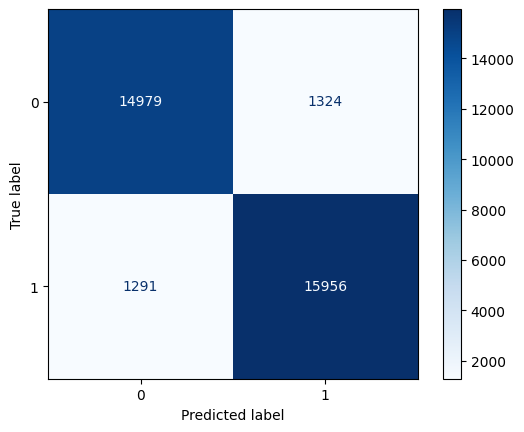

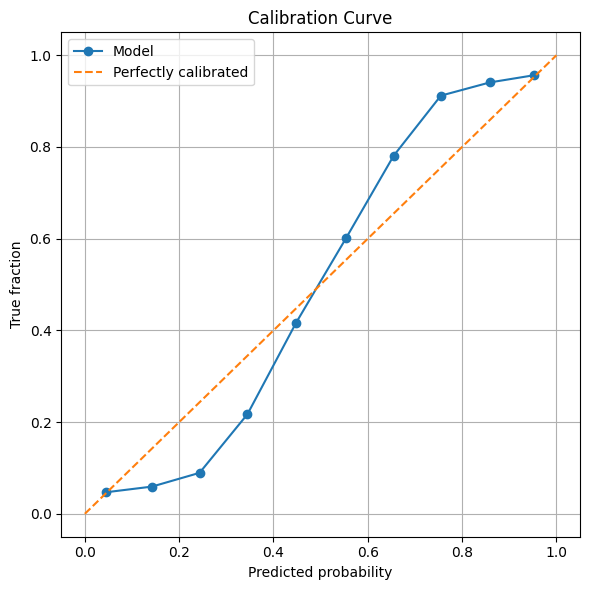

In [ ]:
# Train
clf = LogisticRegression(max_iter=1000, class_weight='balanced')
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap="Blues", values_format='d')

y_pred = clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {roc_auc:.4f}")

print("Log Loss:", log_loss(y_test, y_pred))

y_pred = clf.predict_proba(X_test)[:, 1]

prob_true, prob_pred = calibration_curve(y_test, y_pred, n_bins=10, strategy='uniform')

plt.figure(figsize=(6, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Predicted probability')
plt.ylabel('True fraction')
plt.title('Calibration Curve')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Train Random Forest
start_time = time.time()
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=20,
    min_samples_split=10,
    random_state=42,
    class_weight='balanced'
)
rf.fit(X_train, y_train)

# Get feature importances and top feature indices
importances = rf.feature_importances_
top_n = 200
top_indices = np.argsort(importances)[-top_n:]  # Get indices of top features

# Reduce train/test matrices using top feature indices
X_train_reduced = X_train[:, top_indices]
X_test_reduced = X_test[:, top_indices]

# Retrain RF on reduced feature set
rf_final = RandomForestClassifier(n_estimators=300,
    max_depth=None,
    min_samples_leaf=20,
    min_samples_split=10,
    random_state=42,
    class_weight='balanced'
)
rf_final.fit(X_train_reduced, y_train)

# Predict and calculate runtime
y_pred_final = rf_final.predict(X_test_reduced)
y_pred_full = rf.predict(X_test)
run_time_RF = time.time() - start_time

In [ ]:
feature_names = vectorizer.get_feature_names_out()

# Get importances and sort top features
importances = rf.feature_importances_
top_n = 100
top_indices = np.argsort(importances)[-top_n:]  # top N feature indices
top_feature_names = feature_names[top_indices]
top_importance_scores = importances[top_indices]

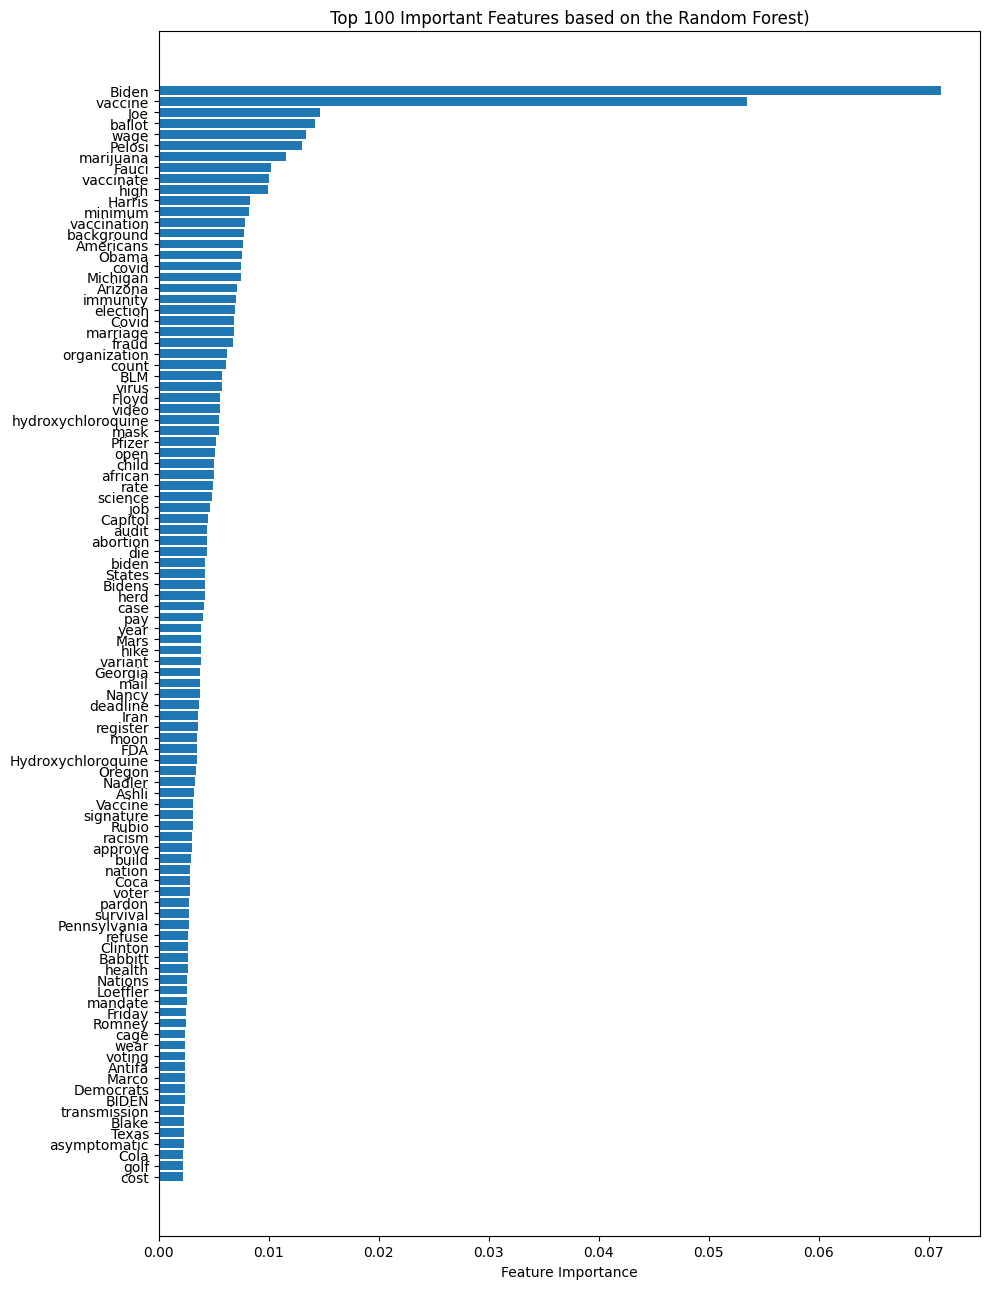

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 13))
plt.barh(top_feature_names, top_importance_scores)
plt.xlabel("Feature Importance")
plt.title(f"Top {top_n} Important Features based on the Random Forest)")
plt.tight_layout()
plt.show()

By looking at the graph, we see that there are 52 important features. We have therefore adjusted the number of features in random forrest to 50 by setting top_n = 50.

In [ ]:
#Reduced dimensionality classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_final))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     16303
           1       0.87      0.86      0.87     17247

    accuracy                           0.86     33550
   macro avg       0.86      0.86      0.86     33550
weighted avg       0.86      0.86      0.86     33550



In [ ]:
#full dimensionality random forrest classification report

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_full))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89     16303
           1       0.90      0.90      0.90     17247

    accuracy                           0.90     33550
   macro avg       0.90      0.90      0.90     33550
weighted avg       0.90      0.90      0.90     33550



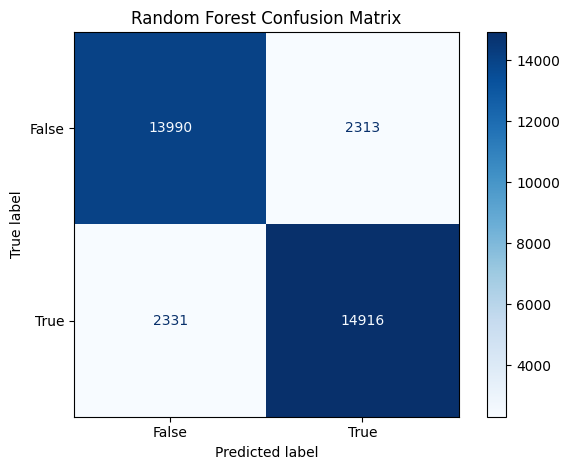

In [ ]:
#reduced dimensionality confusion matrix
cm = confusion_matrix(y_test, y_pred_final)
class_labels = ["False", "True"]
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='Blues', values_format='d')
plt.title('Random Forest Confusion Matrix')
plt.tight_layout()
plt.show()

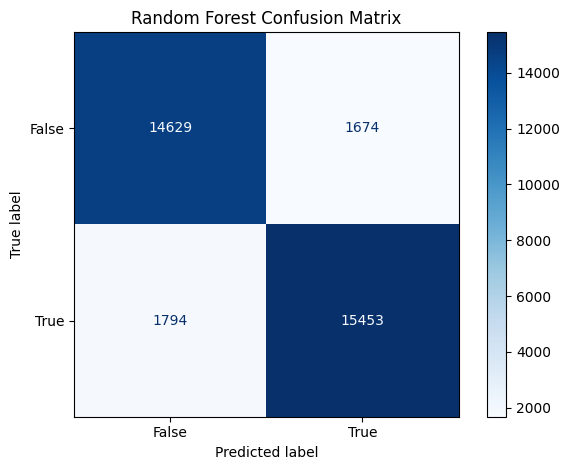

In [ ]:
#Full dimensionality confusion matrix

cm = confusion_matrix(y_test, y_pred_full)
class_labels = ["False", "True"]
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='Blues', values_format='d')
plt.title('Random Forest Confusion Matrix')
plt.tight_layout()
plt.show()

# Word2Vec (since BERT was not possible)

In [ ]:
import gensim.downloader as api
from gensim.models import Word2Vec, KeyedVectors

# Load a pretrained Word2Vec model (Google News or GloVe-like)
word_vectors = api.load('word2vec-google-news-300')


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
df_tweets['cleaned_tweet'] = df_tweets['tweet'].str.replace(r'[@#](\w+)', r'\1', regex=True)

In [ ]:
texts = df_tweets['cleaned_tweet']
labels = df_tweets['target_tweet'].values

# Tokenize
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

# Automatically set maxlen to the longest tweet
maxlen = max(len(seq) for seq in sequences)

# Pad sequences to maxlen - used for data split and model fit
data = pad_sequences(sequences, maxlen=maxlen)

# Create embedding matrix
embedding_dim = 300
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    if word in word_vectors:
        embedding_matrix[i] = word_vectors[word]


In [ ]:
word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'and': 4,
 'a': 5,
 'in': 6,
 'is': 7,
 'that': 8,
 'for': 9,
 'you': 10,
 'are': 11,
 'it': 12,
 'not': 13,
 'on': 14,
 'i': 15,
 'have': 16,
 'was': 17,
 'trump': 18,
 'with': 19,
 'he': 20,
 'they': 21,
 'be': 22,
 'this': 23,
 'from': 24,
 'more': 25,
 'has': 26,
 'people': 27,
 'as': 28,
 'all': 29,
 'but': 30,
 'biden': 31,
 'no': 32,
 'we': 33,
 'by': 34,
 'if': 35,
 'amp': 36,
 'than': 37,
 'so': 38,
 'will': 39,
 'at': 40,
 'about': 41,
 'his': 42,
 'or': 43,
 'who': 44,
 'your': 45,
 'an': 46,
 'just': 47,
 'do': 48,
 'what': 49,
 'their': 50,
 'covid': 51,
 'up': 52,
 'out': 53,
 'were': 54,
 'when': 55,
 '1': 56,
 'would': 57,
 'vaccine': 58,
 'there': 59,
 'like': 60,
 'tax': 61,
 'one': 62,
 'us': 63,
 'because': 64,
 'get': 65,
 'how': 66,
 'can': 67,
 'now': 68,
 'why': 69,
 'years': 70,
 'had': 71,
 'only': 72,
 'americans': 73,
 'our': 74,
 'its': 75,
 'been': 76,
 'them': 77,
 'did': 78,
 'over': 79,
 '2': 80,
 'said': 81,
 'states': 8

In [ ]:
model = Sequential([
    Embedding(input_dim=len(word_index)+1,
              output_dim=embedding_dim,
              weights=[embedding_matrix], # Loads our pretrained word embeddings into our model
              trainable=False), #freezes embeddings from word2vec so that they are not altered during training

    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)

2025-05-28 22:25:01.150844: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [ ]:
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, stratify=labels, test_size=0.25, random_state=42)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # 20% of training data used for validation
    epochs=20,
    batch_size=32,
    callbacks=[early_stop]
)


Epoch 1/20
2517/2517 ━━━━━━━━━━━━━━━━━━━━ 170s 66ms/step - accuracy: 0.7717 - loss: 0.4897 - precision: 0.7684 - recall: 0.8070 - val_accuracy: 0.8770 - val_loss: 0.3318 - val_precision: 0.8769 - val_recall: 0.8856
Epoch 2/20
2517/2517 ━━━━━━━━━━━━━━━━━━━━ 167s 66ms/step - accuracy: 0.8870 - loss: 0.3166 - precision: 0.8885 - recall: 0.8928 - val_accuracy: 0.9041 - val_loss: 0.2807 - val_precision: 0.9126 - val_recall: 0.9001
Epoch 3/20
2517/2517 ━━━━━━━━━━━━━━━━━━━━ 168s 67ms/step - accuracy: 0.9144 - loss: 0.2649 - precision: 0.9140 - recall: 0.9199 - val_accuracy: 0.9160 - val_loss: 0.2616 - val_precision: 0.9039 - val_recall: 0.9365
Epoch 4/20
2517/2517 ━━━━━━━━━━━━━━━━━━━━ 168s 67ms/step - accuracy: 0.9254 - loss: 0.2381 - precision: 0.9241 - recall: 0.9304 - val_accuracy: 0.9193 - val_loss: 0.2524 - val_precision: 0.9038 - val_recall: 0.9438
Epoch 5/20
2517/2517 ━━━━━━━━━━━━━━━━━━━━ 169s 67ms/step - accuracy: 0.9355 - loss: 0.2190 - precision: 0.9365 - recall: 0.9386 - val_accura

In [ ]:
# Predict probabilities
y_pred_probs = history.model.predict(X_test)

# Convert to binary predictions
y_pred = (y_pred_probs > 0.5).astype("int")

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Real", "Fake"]))


1049/1049 ━━━━━━━━━━━━━━━━━━━━ 26s 24ms/step
Classification Report:

              precision    recall  f1-score   support

        Real       0.93      0.93      0.93     16303
        Fake       0.93      0.93      0.93     17247

    accuracy                           0.93     33550
   macro avg       0.93      0.93      0.93     33550
weighted avg       0.93      0.93      0.93     33550



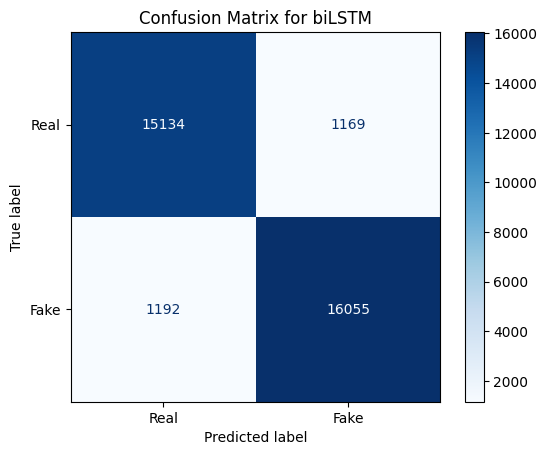

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real", "Fake"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for biLSTM")
plt.show()


It improves the model (with about 2% in accuracy) to remove hastags and @ before running the model

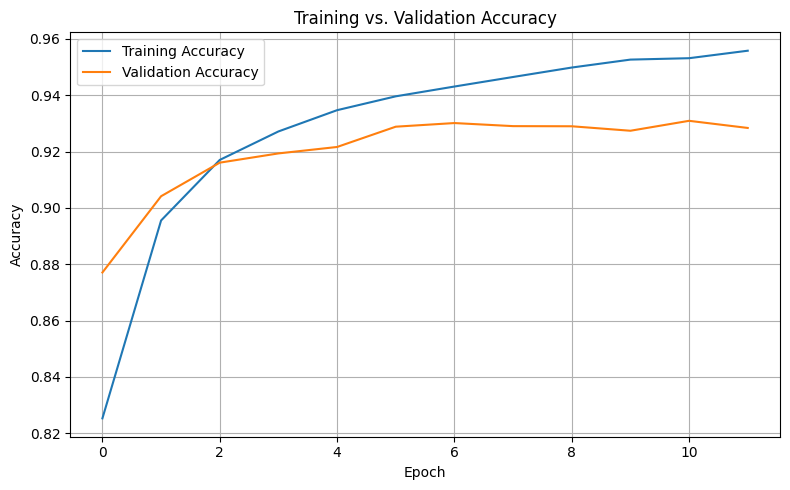

In [ ]:
# Plot training & validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
